In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%pip install chardet


  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/199.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/199.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/199.4 kB ? eta -:--:--
   ---------- ---------------------------- 51.2/199.4 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 199.4/199.4 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\91852\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Analysis

In [9]:
import chardet

with open('Corona_NLP_train.csv', 'rb') as file:
    result = chardet.detect(file.read())

encoding = result['encoding']
print(f"Detected Encoding: {encoding}")

Detected Encoding: MacRoman


In [10]:
train_data = pd.read_csv("Corona_NLP_train.csv", encoding='MacRoman')
test_data = pd.read_csv("Corona_NLP_test.csv", encoding='MacRoman')

In [11]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [13]:
train_data.shape

(41157, 6)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [16]:
train_data['Location'].value_counts()

Location
London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: count, Length: 12220, dtype: int64

In [17]:
train_data['Sentiment'].value_counts()

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

<Axes: title={'center': 'Sentiment Count'}, ylabel='Sentiment'>

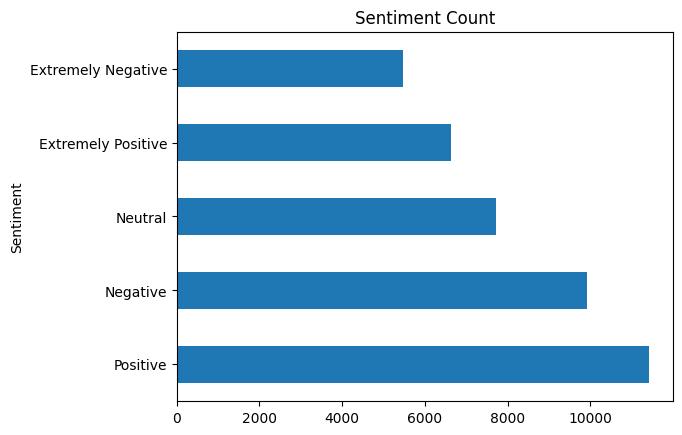

In [22]:
train_data['Sentiment'].value_counts().plot(kind='barh',title='Sentiment Count')



In [24]:
train_data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [26]:
train_data.drop(train_data.columns[[0,1,2,3]],axis=1,inplace=True)
train_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [33]:
print(train_data.isnull().sum())
train_data.duplicated().sum()


OriginalTweet    0
Sentiment        0
dtype: int64


0

Splitting the data into variables

In [37]:
X_train = train_data['OriginalTweet']
Y_train = train_data['Sentiment']

In [41]:
X_test = test_data['OriginalTweet']
Y_test = test_data['Sentiment']

NLP

In [35]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


In [36]:
text_classification = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [38]:
text_classification.fit(X_train,Y_train)

C:\Users\91852\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
predictions = text_classification.predict(X_test)
predictions[:5]

array(['Neutral', 'Positive', 'Extremely Positive', 'Negative', 'Neutral'],
      dtype=object)

In [44]:
accuracy_score(Y_test,predictions)

0.5589784096893101

In [46]:
cm = confusion_matrix(Y_test,predictions)
cm

array([[362,   5, 178,  12,  35],
       [  7, 390,  21,   9, 172],
       [180,  36, 492, 101, 232],
       [ 16,  13, 101, 390,  99],
       [ 33, 180, 164,  81, 489]], dtype=int64)

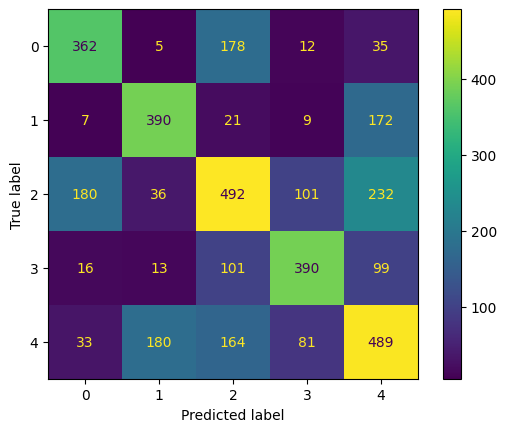

In [47]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

Manual Prediction

In [48]:
tweet = [("I am very happy with the covid process, I hope we get to work from home after the pandemic too.")]
text_classification.predict(tweet)

array(['Extremely Positive'], dtype=object)